In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Obtención de los datos.

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

In [3]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Preparación de los datos.

In [5]:
X = df['sepal length (cm)'].values.reshape(-1,1)
y = df['target']

In [6]:
X

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ],
       [7. ],
       [6.4],
       [6.9],
       [5.5],
       [6.5],
       [5.7],
       [6.3],
       [4.9],
       [6.6],
       [5.2],
       [5. ],
       [5.9],
       [6. ],
       [6.1],
       [5.6],
       [6.7],
       [5.6],
       [5.8],
       [6.2],
       [5.6],
       [5.9],
      

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=100)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Clasificador Naive-Bayes.
https://scikit-learn.org/stable/modules/naive_bayes.html

### Construcción del clasificador.

In [9]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_train_predict = classifier.predict(X_train)
y_test_predict = classifier.predict(X_test)

In [11]:
# para ver las probabilidades de que lo clasifique en cada categoría
X_prueba = [[0.5]]
classifier.predict_proba(X_prueba)

array([[0.00800942, 0.62644675, 0.36554383]])

In [12]:
classifier.predict(X_prueba)

array([1])

In [13]:
from sklearn.metrics import r2_score
print(r2_score(y_train, y_train_predict))
print()
print(r2_score(y_test, y_test_predict))

0.4845509673693329

0.7051114023591087


In [14]:
from sklearn.metrics import confusion_matrix

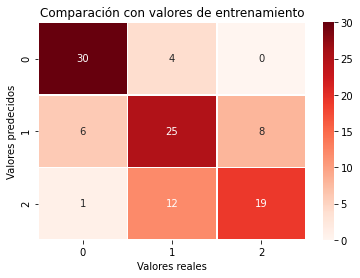

In [15]:
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Valores predecidos')
plt.xlabel('Valores reales')
plt.title('Comparación con valores de entrenamiento')
plt.show()

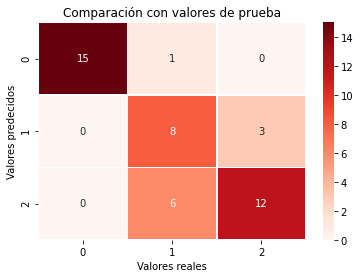

In [16]:
cm = confusion_matrix(y_test, y_test_predict)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Valores predecidos')
plt.xlabel('Valores reales')
plt.title('Comparación con valores de prueba')
plt.show()

# Probemos la clasificación dandole más variables.

In [17]:
X = df.drop("target", axis = 1)
y = df['target']

In [18]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=100)

In [20]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_train_predict = classifier.predict(X_train)
y_test_predict = classifier.predict(X_test)

In [27]:
# le das valores a todas las variables para saber cómo lo clasificaría en ese caso
X_prueba = [[0.4, 0.3, 0.4, 0.6]]
X_prueba
classifier.predict_proba(X_prueba)

array([[8.38580594e-55, 9.99929276e-01, 7.07239660e-05]])

In [28]:
classifier.predict(X_prueba)

array([1])

In [24]:
from sklearn.metrics import r2_score
print(r2_score(y_train, y_train_predict))
print()
print(r2_score(y_test, y_test_predict))

0.9241986716719607

0.9410222804718218


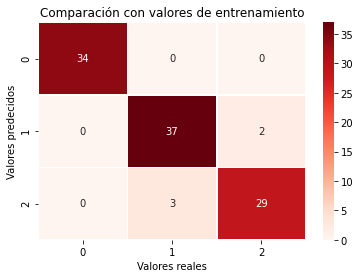

In [25]:
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Valores predecidos')
plt.xlabel('Valores reales')
plt.title('Comparación con valores de entrenamiento')
plt.show()

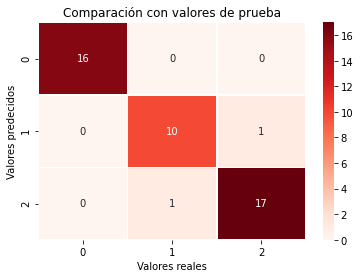

In [26]:
cm = confusion_matrix(y_test, y_test_predict)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Valores predecidos')
plt.xlabel('Valores reales')
plt.title('Comparación con valores de prueba')
plt.show()